#1.Problem Statement
  
  The objective was to construct a predictive model to determine the sales of individual products at specific stores. The dataset included information on product attributes, store details, and sales data for the year 2013.

#2.Hypothesis Generation

a.Store Impact Hypothesis:
  Larger stores with a diverse product range may experience higher sales.

b.Location Influence Hypothesis:
  Urban stores might have higher sales due to increased foot traffic.

c.Product Visibility Hypothesis:
  Products placed prominently within stores may exhibit higher sales.

d.Seasonal Variation Hypothesis:
  Certain products may witness sales fluctuations based on seasonal trends.

e.Promotion Effectiveness Hypothesis:
  Products featured in promotions or discounts may experience increased sales.

f.Store Management Hypothesis:
  Stores with effective management may consistently outperform others.





# 3.Loading packages and dataset


loading packages

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


Loading the dataset

In [2]:
train_df=pd.read_csv("Train.csv")
train_df.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDA15        9.300          Low Fat         0.016047   
1              DRC01        5.920          Regular         0.019278   
2              FDN15       17.500          Low Fat         0.016760   
3              FDX07       19.200          Regular         0.000000   
4              NCD19        8.930          Low Fat         0.000000   
...              ...          ...              ...              ...   
8518           FDF22        6.865          Low Fat         0.056783   
8519           FDS36        8.380          Regular         0.046982   
8520           NCJ29       10.600          Low Fat         0.035186   
8521           FDN46        7.210          Regular         0.145221   
8522           DRG01       14.800          Low Fat         0.044878   

                  Item_Type  Item_MRP Outlet_Identifier  \
0                     Dairy  249.8092            OUT049   

In [3]:
train_df.shape

(8523, 12)

In [4]:
test_df=pd.read_csv("Test.csv")
test_df.head

<bound method NDFrame.head of      Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750          Low Fat         0.007565   
1              FDW14        8.300              reg         0.038428   
2              NCN55       14.600          Low Fat         0.099575   
3              FDQ58        7.315          Low Fat         0.015388   
4              FDY38          NaN          Regular         0.118599   
...              ...          ...              ...              ...   
5676           FDB58       10.500          Regular         0.013496   
5677           FDD47        7.600          Regular         0.142991   
5678           NCO17       10.000          Low Fat         0.073529   
5679           FDJ26       15.300          Regular         0.000000   
5680           FDU37        9.500          Regular         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1    

In [5]:
test_df.shape

(5681, 11)

In [6]:
data=[train_df,test_df]
df=pd.concat(data)
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


# 4.Data Structure and Content

In [8]:
# Display basic information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14204 entries, 0 to 5680
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.4+ MB
None


In [9]:
# Display basic statistics of numerical columns
print(df.describe())

        Item_Weight  Item_Visibility      Item_MRP  Outlet_Establishment_Year  \
count  11765.000000     14204.000000  14204.000000               14204.000000   
mean      12.792854         0.065953    141.004977                1997.830681   
std        4.652502         0.051459     62.086938                   8.371664   
min        4.555000         0.000000     31.290000                1985.000000   
25%        8.710000         0.027036     94.012000                1987.000000   
50%       12.600000         0.054021    142.247000                1999.000000   
75%       16.750000         0.094037    185.855600                2004.000000   
max       21.350000         0.328391    266.888400                2009.000000   

       Item_Outlet_Sales  
count        8523.000000  
mean         2181.288914  
std          1706.499616  
min            33.290000  
25%           834.247400  
50%          1794.331000  
75%          3101.296400  
max         13086.964800  


In [10]:
# Display the first few rows of the DataFrame
print(df.head())

  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

In [11]:
print(df.columns)

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


Data Visualization

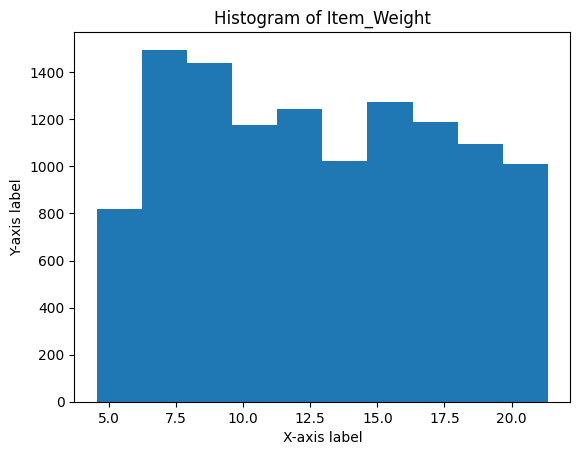

In [12]:
# Histogram of  Item_Weight column
plt.hist(df['Item_Weight'], bins=10)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram of Item_Weight')
plt.show()

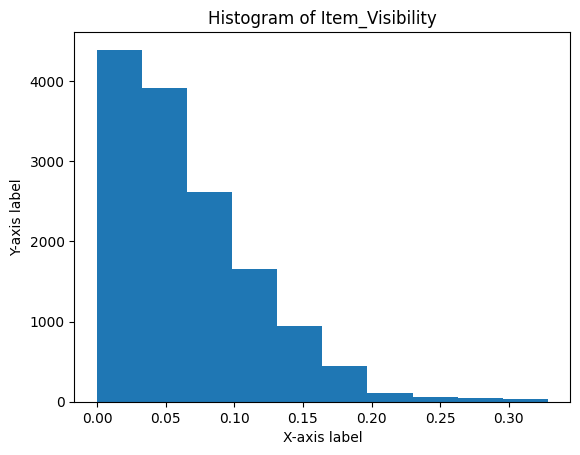

In [13]:
# Histogram of Item_Visibility column
plt.hist(df['Item_Visibility'], bins=10)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram of Item_Visibility')
plt.show()

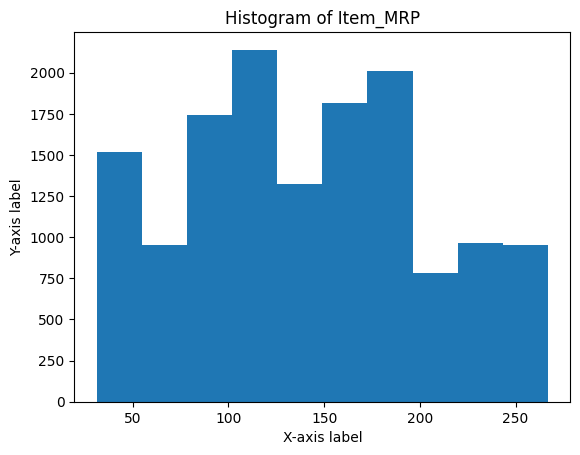

In [14]:
# Histogram of Item_MRP column
plt.hist(df['Item_MRP'], bins=10)
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Histogram of Item_MRP')
plt.show()

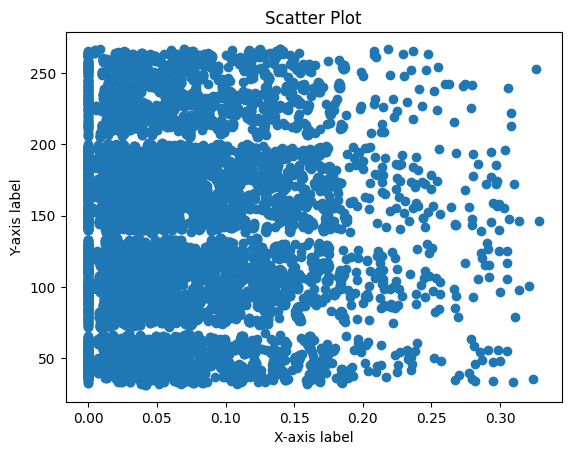

In [15]:
# Scatter plot for two numerical columns
plt.scatter(df['Item_Visibility'], df['Item_MRP'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot')
plt.show()

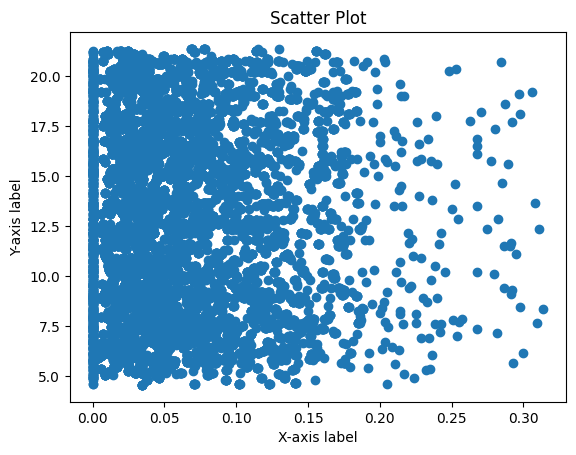

In [16]:
# Scatter plot for two numerical columns
plt.scatter(df['Item_Visibility'], df['Item_Weight'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot')
plt.show()

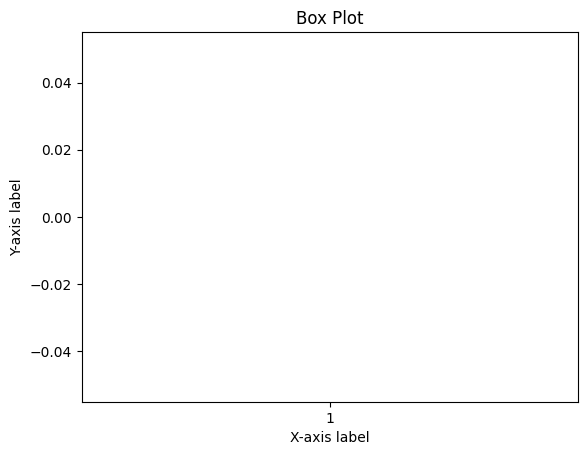

In [17]:
# Box plot for a numerical column
plt.boxplot(df['Item_Weight'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Box Plot')
plt.show()

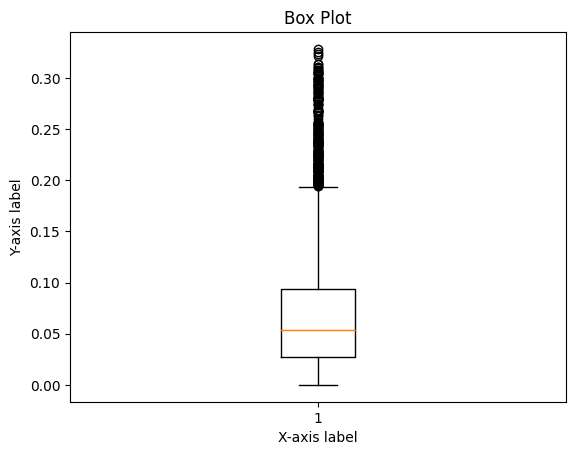

In [18]:
# Box plot for a numerical column
plt.boxplot(df['Item_Visibility'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Box Plot')
plt.show()

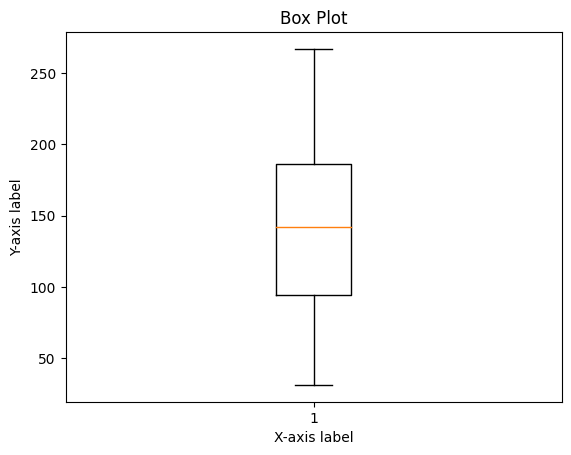

In [19]:
# Box plot for a numerical column
plt.boxplot(df['Item_MRP'])
plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Box Plot')
plt.show()

# 5.Exploratory Data Analysis

Removing duplicates

In [20]:
# Display the number of duplicate rows before removal
print("Number of duplicate rows before removal:",df.duplicated().sum())

# Remove duplicate rows based on all columns
df = df.drop_duplicates()

# Display the number of duplicate rows after removal
print("Number of duplicate rows after removal:", df.duplicated().sum())


Number of duplicate rows before removal: 0
Number of duplicate rows after removal: 0


Outlier Treatment

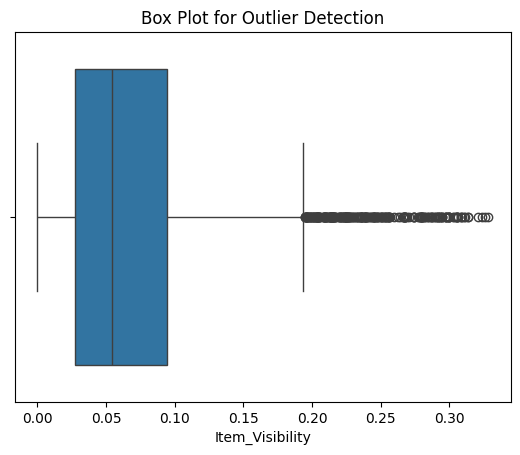

In [21]:
#identifying Outliers

# Box Plot for  Item_Visibility with potential outliers
sns.boxplot(x='Item_Visibility', data=df)
plt.xlabel('Item_Visibility')
plt.title('Box Plot for Outlier Detection')
plt.show()


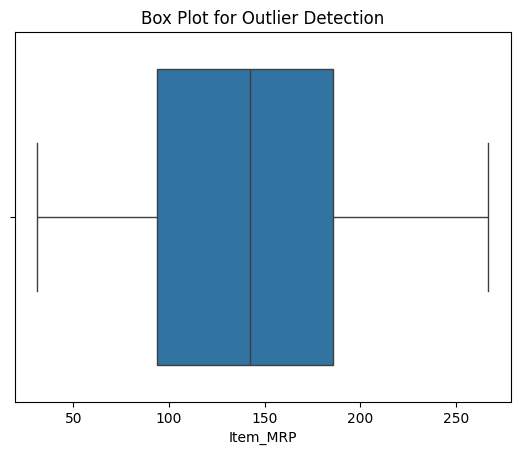

In [22]:
# Box Plot for  Item_MRP with potential outliers
sns.boxplot(x='Item_MRP', data=df)
plt.xlabel('Item_MRP')
plt.title('Box Plot for Outlier Detection')
plt.show()


Removing Outliers

In [23]:
# Assuming  Item_Weight is the column with potential outliers
Q1 = df['Item_Weight'].quantile(0.25)
Q3 = df['Item_Weight'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers beyond a certain range
df = df[(df['Item_Weight'] >= Q1 - 1.5 * IQR) & (df['Item_Weight'] <= Q3 + 1.5 * IQR)]
df


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [24]:
# Assuming  Item_Visibility is the column with potential outliers
Q1 = df['Item_Visibility'].quantile(0.25)
Q3 = df['Item_Visibility'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers beyond a certain range
df = df[(df['Item_Visibility'] >= Q1 - 1.5 * IQR) & (df['Item_Visibility'] <= Q3 + 1.5 * IQR)]
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


In [25]:
# Assuming  Item_MRP is the column with potential outliers
Q1 = df['Item_MRP'].quantile(0.25)
Q3 = df['Item_MRP'].quantile(0.75)
IQR = Q3 - Q1

# Removing outliers beyond a certain range
df = df[(df['Item_MRP'] >= Q1 - 1.5 * IQR) & (df['Item_MRP'] <= Q3 + 1.5 * IQR)]
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN
5677,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN
5678,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN
5679,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN


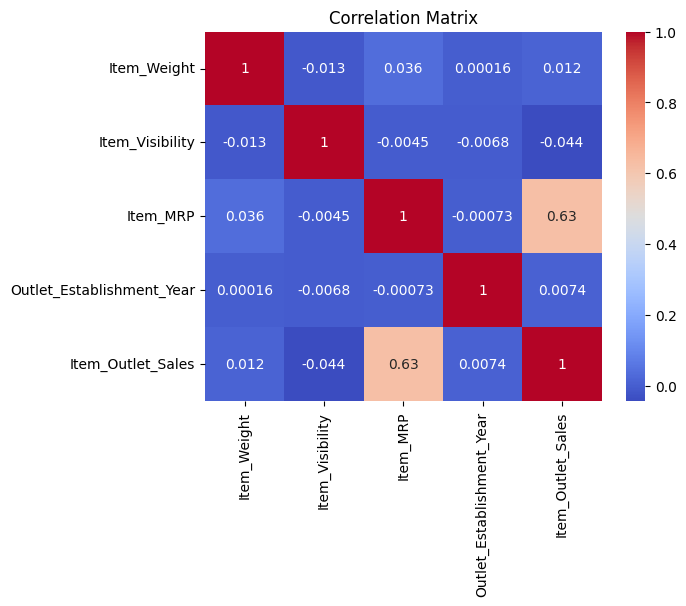

In [26]:
# Explore correlations between features
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 6.Univariate Analysis

Calculate Summary Statistics

In [27]:
#calculate mean of 'Item_Weight'
Item_Weight_mean=df['Item_Weight'].mean()
Item_Weight_mean

12.798808152033706

In [28]:
#calculate median of 'Item_Weight'
Item_Weight_median=df['Item_Weight'].median()
Item_Weight_median

12.6

In [29]:
#calculate standard deviation of 'Item_Weight'
Item_Weight_sd=df['Item_Weight'].std()
Item_Weight_sd

4.653546578073422

In [30]:
#calculate mean of 'Item_Visibility'
Item_Visibility_mean=df['Item_Visibility'].mean()
Item_Visibility_mean

0.061574752059850364

In [31]:
#calculate median of 'Item_Visibility'
Item_Visibility_median=df['Item_Visibility'].median()
Item_Visibility_median

0.051791671

In [32]:
#calculate standard deviation of 'Item_Visibility'
Item_Visibility_sd=df['Item_Visibility'].std()
Item_Visibility_sd

0.04486119067401928

In [33]:
#calculate mean of 'Item_MRP'
Item_MRP_mean=df['Item_MRP'].mean()
Item_MRP_mean

141.06611718978417

In [34]:
#calculate median of 'Item_MRP'
Item_MRP_median=df['Item_MRP'].median()
Item_MRP_median

142.147

In [35]:
#calculate standard deviation of 'Item_MRP'
Item_MRP_sd=df['Item_MRP'].std()
Item_MRP_sd

62.10942056684823

Create Frequency Table

In [36]:
#create frequency table for 'Item_Weight'
df['Item_Weight'].value_counts()

17.600    135
12.150    125
10.500    122
13.650    114
11.800    111
         ... 
8.840       7
6.465       7
7.850       6
4.615       6
9.035       6
Name: Item_Weight, Length: 415, dtype: int64

In [37]:
#create frequency table for 'Item_Visibility'
df['Item_Visibility'].value_counts()

0.000000    733
0.077169      3
0.076792      3
0.076841      3
0.077011      3
           ... 
0.071367      1
0.058193      1
0.022976      1
0.111221      1
0.104720      1
Name: Item_Visibility, Length: 10633, dtype: int64

In [38]:
#create frequency table for 'Item_MRP'
df['Item_MRP'].value_counts()

166.0526    7
196.5768    7
120.8756    6
172.0422    6
142.0154    6
           ..
178.6028    1
141.7838    1
91.7488     1
112.7518    1
79.7960     1
Name: Item_MRP, Length: 7225, dtype: int64

Distribution of the target variable

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

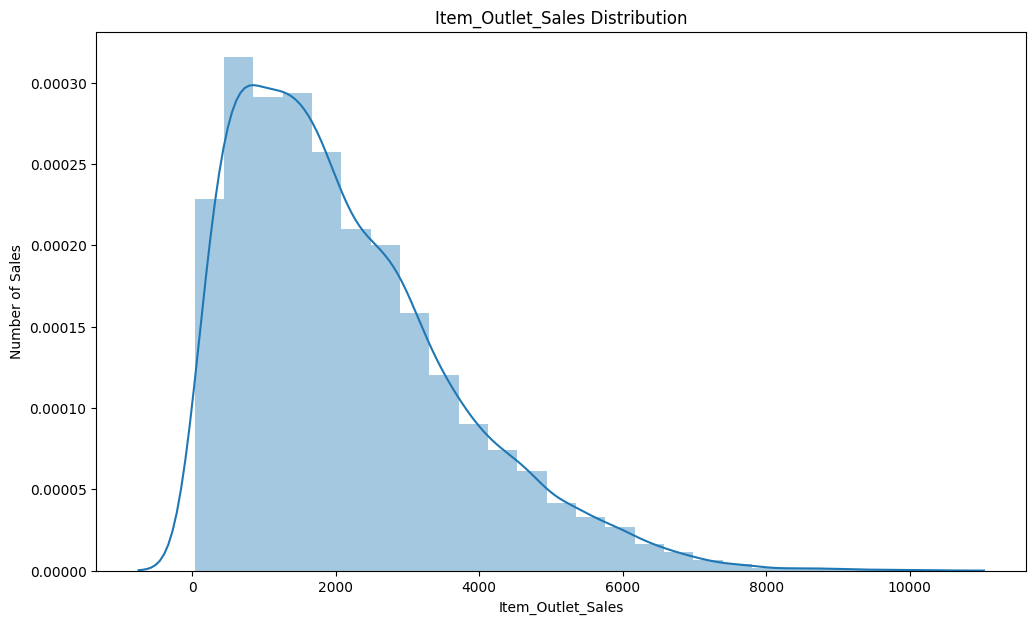

In [39]:
# Item_Outlet_Sales

plt.figure(figsize=(12,7))
sns.distplot(df.Item_Outlet_Sales, bins = 25)
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

numerical features

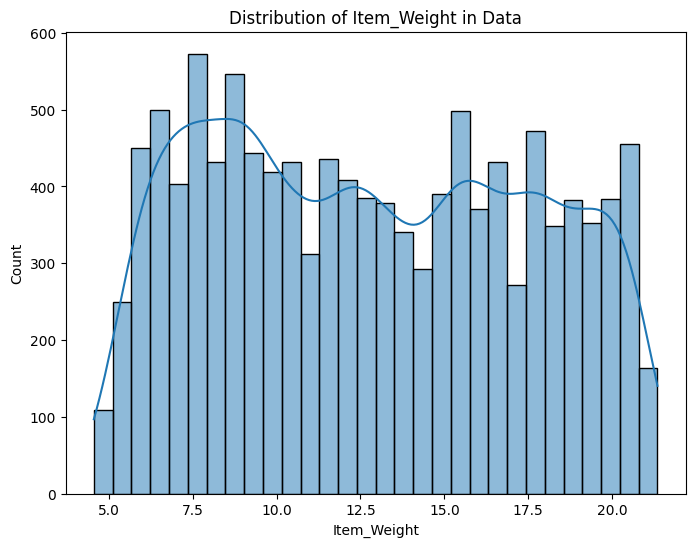

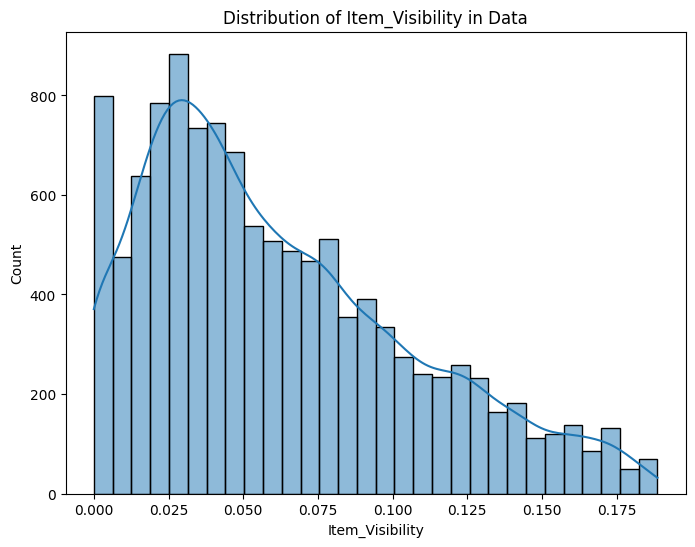

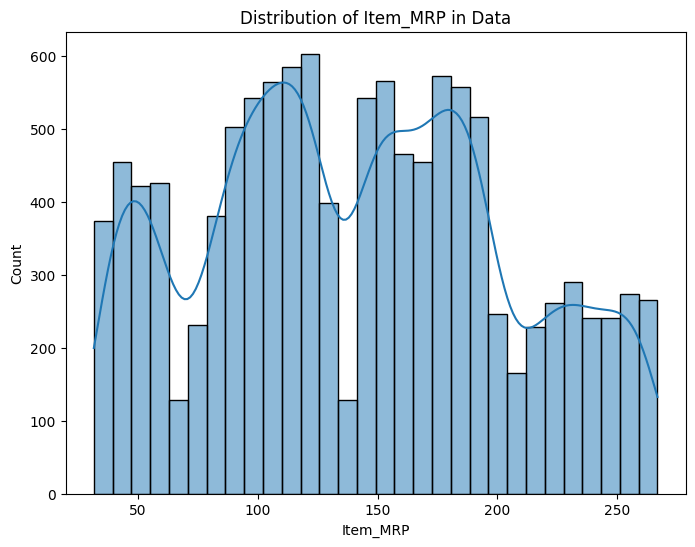

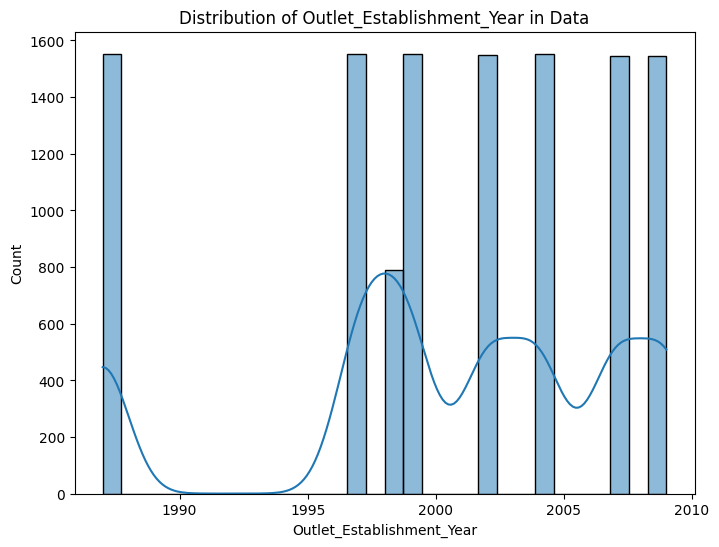

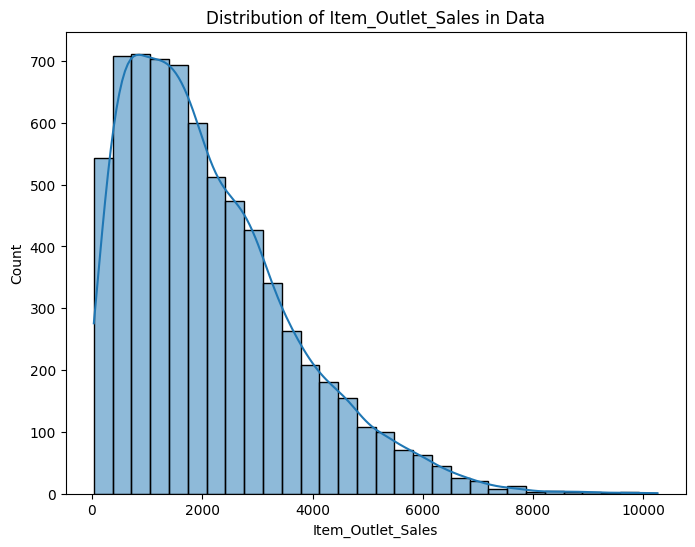

In [40]:
# Univariate analysis for numerical features
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
for feature in numerical_features:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f'Distribution of {feature} in Data')
    plt.show()

# 6.Bivariate Analysis

Scatterplots

Numerical Variables

Text(0, 0.5, 'Item_Outlet_Sales')

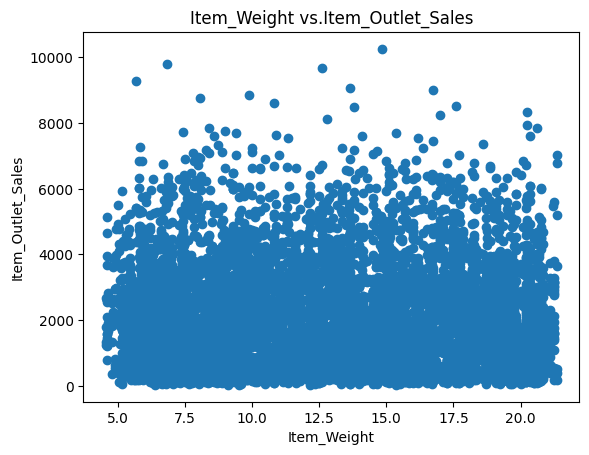

In [41]:
plt.scatter(df.Item_Weight, df.Item_Outlet_Sales)
plt.title('Item_Weight vs.Item_Outlet_Sales')
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

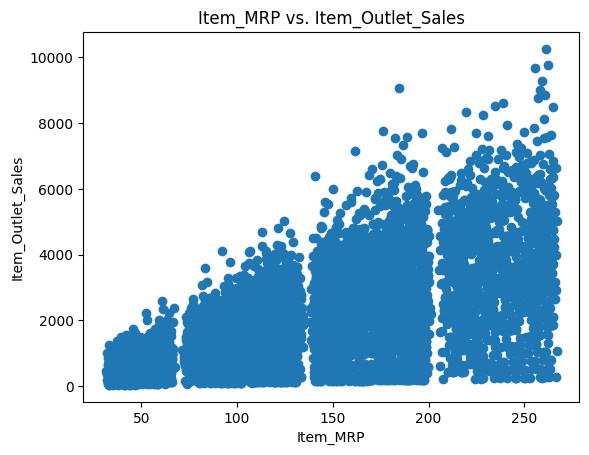

In [42]:
plt.scatter(df.Item_MRP, df.Item_Outlet_Sales)
plt.title('Item_MRP vs. Item_Outlet_Sales')
plt.xlabel('Item_MRP')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

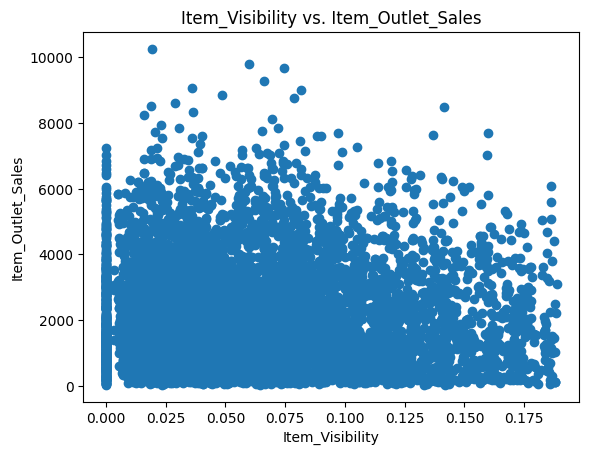

In [43]:
plt.scatter(df.Item_Visibility, df.Item_Outlet_Sales)
plt.title('Item_Visibility vs. Item_Outlet_Sales')
plt.xlabel('Item_Visibility')
plt.ylabel('Item_Outlet_Sales')

Text(0, 0.5, 'Item_Outlet_Sales')

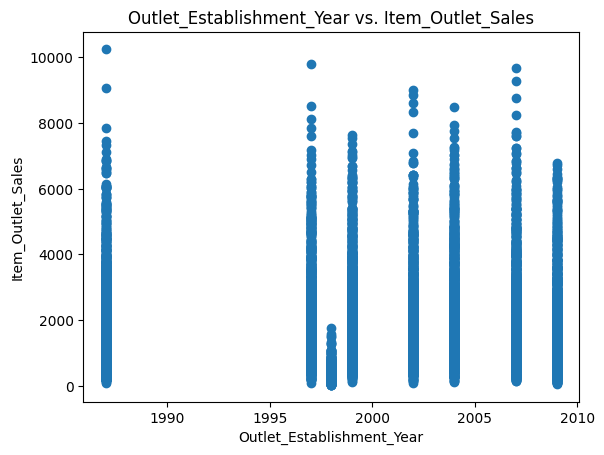

In [44]:
plt.scatter(df.Outlet_Establishment_Year, df.Item_Outlet_Sales)
plt.title('Outlet_Establishment_Year vs. Item_Outlet_Sales')
plt.xlabel('Outlet_Establishment_Year')
plt.ylabel('Item_Outlet_Sales')

Correlation Coefficients

In [45]:
#create correlation matrix
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012511,0.035817,0.000162,0.011855
Item_Visibility,-0.012511,1.000000,-0.004461,-0.006760,-0.043807
Item_MRP,0.035817,-0.004461,1.000000,-0.000729,0.626724
Outlet_Establishment_Year,0.000162,-0.006760,-0.000729,1.000000,0.007388
Item_Outlet_Sales,0.011855,-0.043807,0.626724,0.007388,1.000000


Simple Linear Regression

In [46]:
#define response variable
y = df['Item_Outlet_Sales']

#define explanatory variable
x = df[['Item_Weight']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 23 Jan 2024   Prob (F-statistic):                nan
Time:                        13:34:45   Log-Likelihood:                    nan
No. Observations:               11629   AIC:                               nan
Df Residuals:                   11627   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const              nan        nan        nan      

In [47]:
#define response variable
y = df['Item_Outlet_Sales']

#define explanatory variable
x = df[['Item_Visibility']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 23 Jan 2024   Prob (F-statistic):                nan
Time:                        13:34:51   Log-Likelihood:                    nan
No. Observations:               11629   AIC:                               nan
Df Residuals:                   11627   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const                  nan        nan     

In [48]:
#define response variable
y = df['Item_Outlet_Sales']

#define explanatory variable
x = df[['Item_MRP']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      Item_Outlet_Sales   R-squared:                         nan
Model:                            OLS   Adj. R-squared:                    nan
Method:                 Least Squares   F-statistic:                       nan
Date:                Tue, 23 Jan 2024   Prob (F-statistic):                nan
Time:                        13:34:56   Log-Likelihood:                    nan
No. Observations:               11629   AIC:                               nan
Df Residuals:                   11627   BIC:                               nan
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const             nan        nan        nan        n

# 8. Missing Value Treatment

In [49]:
# Check for missing values
print(df.isnull().sum())

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  3880
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            4646
dtype: int64


Replace missing values with the mean of each column



In [50]:
df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [51]:
mode_value = df['Outlet_Size'].mode()[0]
df['Outlet_Size'].fillna(mode_value, inplace=True)


In [52]:
# Replace missing values with the mean of Item_Outlet_Sales
df['Item_Outlet_Sales'].fillna(df['Item_Outlet_Sales'].mean(), inplace=True)


In [53]:
print(df.isnull().sum())

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64


# 9.Feature Engineering

In [54]:
#checking the number of unique values in each column
df.apply(lambda x: x.nunique())

Item_Identifier               1559
Item_Weight                    415
Item_Fat_Content                 5
Item_Visibility              10633
Item_Type                       16
Item_MRP                      7225
Outlet_Identifier                8
Outlet_Establishment_Year        8
Outlet_Size                      3
Outlet_Location_Type             3
Outlet_Type                      3
Item_Outlet_Sales             3042
dtype: int64

In [55]:
# Feature: Item_Weight_Group
# Binning 'Item_Weight' into groups: 'Low', 'Medium', 'High'
bins = [0, 5, 10, 15, 20, float('inf')]
labels = ['Very Light', 'Light', 'Medium', 'Heavy', 'Very Heavy']
df['Item_Weight_Group'] = pd.cut(df['Item_Weight'], bins=bins, labels=labels, include_lowest=True)

In [56]:
df.drop('Item_Identifier', axis=1)

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,Item_Weight_Group
0,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.138000,Light
1,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.422800,Light
2,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.270000,Heavy
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.380000,Heavy
4,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.705200,Light
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,2138.447389,Medium
5677,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,2138.447389,Light
5678,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,Small,Tier 2,Supermarket Type1,2138.447389,Light
5679,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Small,Tier 2,Supermarket Type1,2138.447389,Heavy


# 10.Encoding Categorical Variables

In [57]:
obj_df = df.select_dtypes(include=['object']).copy()
obj_df.head()

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Small,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1


Cleaning null values

In [58]:
obj_df[obj_df.isnull().any(axis=1)]

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [59]:
obj_df.dtypes

Item_Identifier         object
Item_Fat_Content        object
Item_Type               object
Outlet_Identifier       object
Outlet_Size             object
Outlet_Location_Type    object
Outlet_Type             object
dtype: object

In [60]:
# Identify the target variable (y) and features (X) in the training set
y_train = train_df['Item_Outlet_Sales']  # Replace 'target_column' with the actual name of your target variable
X_train = train_df.drop('Item_Outlet_Sales', axis=1)  # Drop the target variable from the features

# Identify the features (X) in the test set
X_test = test_df.copy()


# 11.Label Encoding

In [61]:
categorical_features = df.select_dtypes(include=['object']).columns
categorical_features

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [62]:
# Apply label encoding to categorical columns in both train and test sets
label_encoder = LabelEncoder()
for column in X_train.select_dtypes(include=['object']).columns:
    X_train[column] = label_encoder.fit_transform(X_train[column])
    X_test[column] = label_encoder.transform(X_test[column])

# 12.One Hot Encoding

In [63]:
# Apply one-hot encoding to categorical columns in both train and test sets
onehot_encoder = OneHotEncoder(sparse=False, drop='first')
for column in X_train.select_dtypes(include=['object']).columns:
    # Reshape to fit the one-hot encoder
    X_train_encoded = onehot_encoder.fit_transform(X_train[column].values.reshape(-1, 1))
    X_test_encoded = onehot_encoder.transform(X_test[column].values.reshape(-1, 1))

    # Create new one-hot encoded columns
    X_train = pd.concat([X_train, pd.DataFrame(X_train_encoded, columns=[f'{column}_{i}' for i in range(X_train_encoded.shape[1])])], axis=1)
    X_test = pd.concat([X_test, pd.DataFrame(X_test_encoded, columns=[f'{column}_{i}' for i in range(X_test_encoded.shape[1])])], axis=1)

# Drop the original categorical columns after encoding
X_train.drop(X_train.select_dtypes(include=['object']).columns, axis=1, inplace=True)
X_test.drop(X_test.select_dtypes(include=['object']).columns, axis=1, inplace=True)


# 13.PreProcessing Data

Normalizing and Scaling

In [64]:
# Identify numerical columns for normalization and scaling
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Normalization (MinMax Scaling)
min_max_scaler = MinMaxScaler()
df[numerical_columns] = min_max_scaler.fit_transform(df[numerical_columns])

# Scaling (Standard Scaling)
standard_scaler = StandardScaler()
df[numerical_columns] = standard_scaler.fit_transform(df[numerical_columns])


In [65]:
# Standardize numerical features if needed
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.select_dtypes(include=['float64', 'int64']))
X_test_scaled = scaler.transform(X_test.select_dtypes(include=['float64', 'int64']))

# 14.Modeling

In [77]:
# Separating the features and target variable
X = df.drop(['Item_Identifier','Item_Fat_Content','Item_Type','Outlet_Identifier','Outlet_Size','Outlet_Location_Type','Outlet_Type','Item_Weight_Group'], axis=1)  # Exclude non-numeric columns
y = df['Item_Outlet_Sales']

# Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

#15.Linear Regression

In [78]:
# Initializing Linear Regression model
linear_reg_model = LinearRegression()

# Fitting the model to the training data
linear_reg_model.fit(X_train, y_train)

# Make predictions on the test set
linear_reg_predictions = linear_reg_model.predict(X_test)

# Evaluate the model
linear_reg_rmse = np.sqrt(mean_squared_error(y_test, linear_reg_predictions))
print("Linear Regression RMSE:", linear_reg_rmse)

Linear Regression RMSE: 6.182574319429973e-16


#16.Regularized Linear Regression

Lasso

In [80]:
from math import sqrt
from sklearn.linear_model import LinearRegression, Lasso, Ridge
lasso_model = Lasso(alpha=0.1)  # You can adjust the alpha value
lasso_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate Lasso Regression model
mse_lasso = mean_squared_error(y_test, y_pred_lasso)
rmse_lasso = sqrt(mse_lasso)
print(f'Lasso Regression RMSE: {rmse_lasso}')

Lasso Regression RMSE: 0.1041065512886004


Ridge

In [81]:
ridge_model = Ridge(alpha=0.1)  # You can adjust the alpha value
ridge_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate Ridge Regression model
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
rmse_ridge = sqrt(mse_ridge)
print(f'Ridge Regression RMSE: {rmse_ridge}')

Ridge Regression RMSE: 1.2492777687369843e-05


# 17.RandomForest

In [82]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Evaluate RandomForest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = sqrt(mse_rf)
print(f'RandomForest RMSE: {rmse_rf}')

RandomForest RMSE: 0.003517023276131852


# 18.XGBoost

In [83]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate XGBoost model
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = sqrt(mse_xgb)
print(f'XGBoost RMSE: {rmse_xgb}')

XGBoost RMSE: 0.0645786172946649


#19. Summary

After a comprehensive analysis of various regression models, including Linear Regression, Regularized Linear Regression (Ridge), RandomForest, and XGBoost, it is evident that "Random Forest model" achieved the lowest RMSE compared to the other models. The lower RMSE implies higher accuracy in predicting sales,and provides the best predictive performance for the BigMart sales prediction project.
